Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       381
           1       0.90      0.86      0.88       419

    accuracy                           0.88       800
   macro avg       0.87      0.88      0.87       800
weighted avg       0.88      0.88      0.88       800

Confusion Matrix:
[[340  41]
 [ 59 360]]


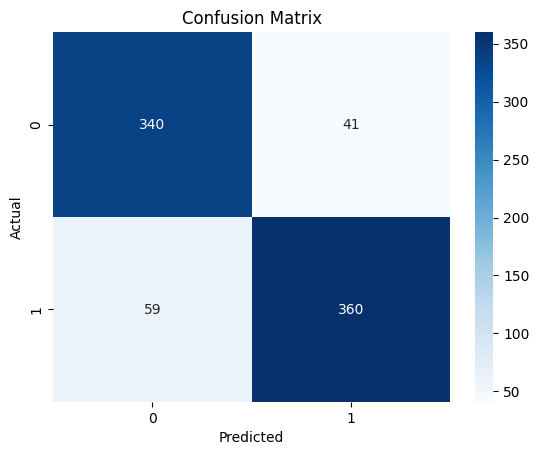

ROC AUC Score: 0.8757884977981572


In [1]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Carga de los datos
url = 'https://raw.githubusercontent.com/ElvisMan2/taller_movil/main/Chronic_Kidney_Dsease_data_new.csv'
data = pd.read_csv(url)

# Separar las características (X) y la variable objetivo (y)
X = data.drop(['Diagnosis', 'PatientID', 'DoctorInCharge'], axis=1)
y = data['Diagnosis']

# Crear una instancia de StandardScaler para estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear una instancia de SMOTE para aplicar sobremuestreo a las clases minoritarias
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Crear una instancia de SVC (Support Vector Classifier) con un kernel lineal
svm_model = SVC(kernel='linear', random_state=42)

# Ajustar el modelo SVC usando los datos de entrenamiento
svm_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = svm_model.predict(X_test)

# Imprimir el informe de clasificación para evaluar el rendimiento del modelo
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Imprimir la matriz de confusión para analizar los errores de clasificación
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Crear un mapa de calor para visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calcular y mostrar la puntuación AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}")


In [2]:
print("datos reales")
print (y_test.to_numpy())

print("Predicciones de y_test:")
print(y_pred)

datos reales
[1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1
 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1
 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0
 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0
 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0
 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1
 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1
 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1
 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0
 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1
 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0
 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1
 1 1 1 0 1 1